# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

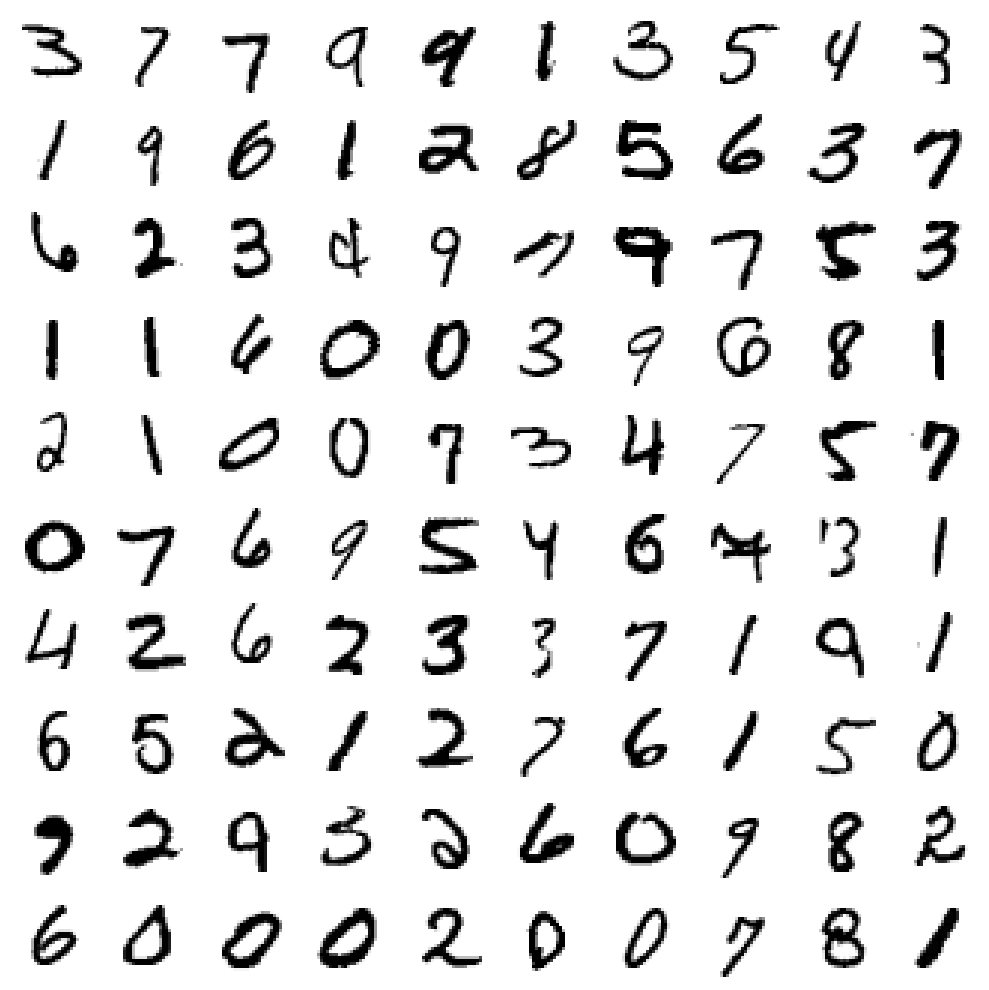

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\20202310\Desktop\Vakken jaar 1\Machine learning in MIA and biology\8DM50_Code\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [3]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.8504 - loss: 0.4838 - val_accuracy: 0.9814 - val_loss: 0.0601
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9733 - loss: 0.0902 - val_accuracy: 0.9886 - val_loss: 0.0371
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9832 - loss: 0.0547 - val_accuracy: 0.9897 - val_loss: 0.0325
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9849 - loss: 0.0458 - val_accuracy: 0.9879 - val_loss: 0.0370
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9900 - loss: 0.0318 - 

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031035955995321274
Test accuracy: 0.991599977016449


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


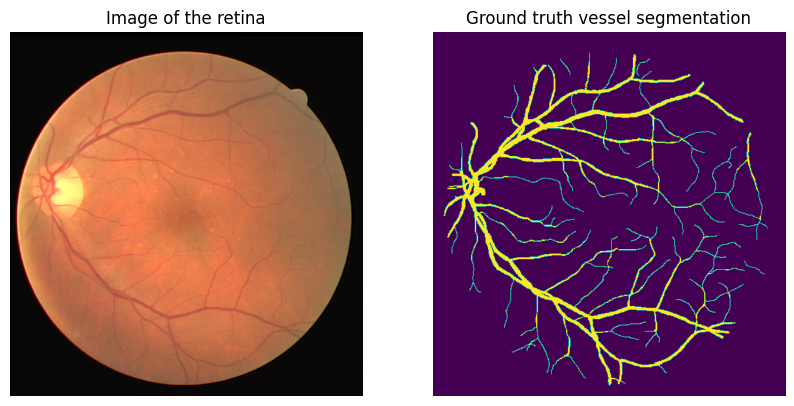

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import load_data

# location of the DRIVE dataset
data_folder = 'DRIVE'
train_paths = glob(data_folder + '/training/images/*.tif')
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


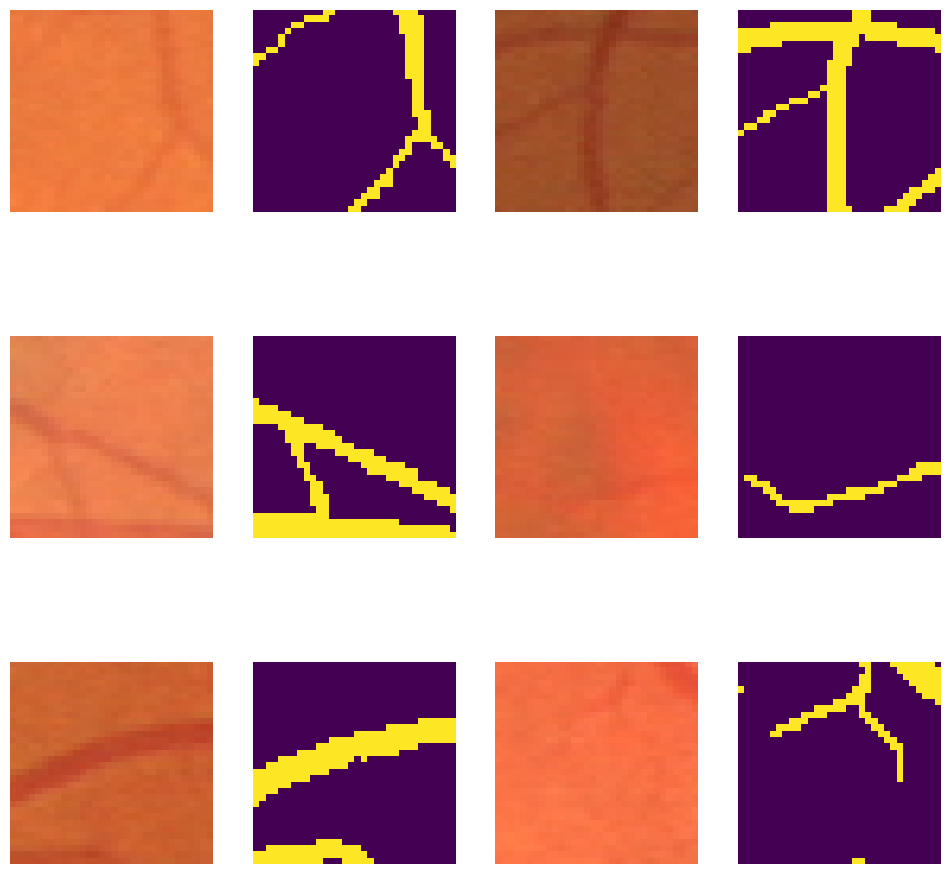

In [6]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [7]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [8]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 45s - 893ms/step - accuracy: 0.8207 - loss: 0.5211 - val_accuracy: 0.3008 - val_loss: 6.6643
Epoch 2/250
50/50 - 28s - 553ms/step - accuracy: 0.9400 - loss: 0.3347 - val_accuracy: 0.9211 - val_loss: 0.3294
Epoch 3/250
50/50 - 22s - 441ms/step - accuracy: 0.9576 - loss: 0.2301 - val_accuracy: 0.9211 - val_loss: 0.2734
Epoch 4/250
50/50 - 23s - 468ms/step - accuracy: 0.9580 - loss: 0.1786 - val_accuracy: 0.9214 - val_loss: 0.2783
Epoch 5/250
50/50 - 24s - 483ms/step - accuracy: 0.9589 - loss: 0.1529 - val_accuracy: 0.9209 - val_loss: 0.2656
Epoch 6/250
50/50 - 23s - 469ms/step - accuracy: 0.9604 - loss: 0.1351 - val_accuracy: 0.9207 - val_loss: 0.2956
Epoch 7/250
50/50 - 24s - 487ms/step - accuracy: 0.9568 - loss: 0.1418 - val_accuracy: 0.9167 - val_loss: 0.3527
Epoch 8/250
50/50 - 24s - 487ms/step - accuracy: 0.9608 - loss: 0.1260 - val_accuracy: 0.9224 - val_loss: 0.3301
Epoch 9/250
50/50 - 26s - 518ms/step - accuracy: 0.9629 - loss

### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


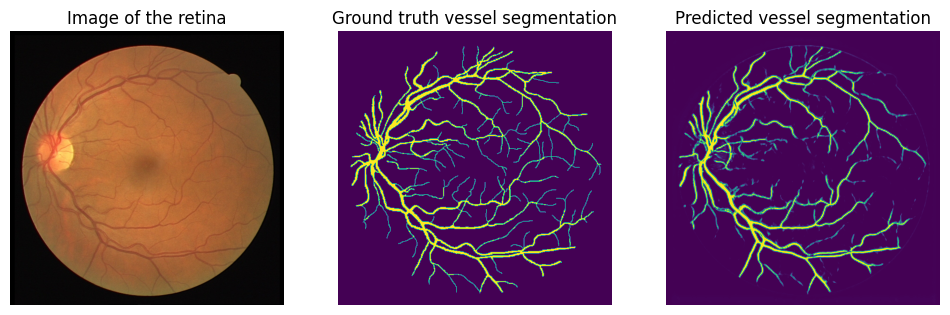

In [9]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + '/test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises


## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

### <font color='#3CB371'> Answer:
the first convolutional layer has 320 parameters, and the first fully connected (dense) layer has 1,179,776 parameters The 320 parameters in the first convolutional layer result from the following: 32 filters (or kernels) with a size of 3×3. For each filter, there are 9 weights (3×3) plus 1 bias parameter per filter. So the total is 32×(3×3+1)=320 The 1,179,776 parameters in the first fully connected layer result from: The output of the previous layer, which was flattened to a size of 12×12×64=9,216. This feeds into 128 neurons, with each neuron having 9,216 weights and 1 bias parameter. The total is 9,216×128+128=1,179,776. General Expressions: For a convolutional layer, the number of parameters is calculated as: Number of parameters=(filter width×filter height×number of input channels+1)×number of filters The +1 is for the bias term associated with each filter. For a fully connected layer, the number of parameters is: Number of parameters=(number of input units×number of output units)+number of output units (bias terms)


<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

### <font color='#3CB371'> General expression of number of parameters of a convolutional layer:

The expression, earlier described in the previous question is equal to the filter height $k_{y}$ multiplied with the filter width $k_{x}$ multiplied with the amount of input channels in the image $n_{in}$ (eg. grayscale is 1, RGB is 3). This is then multiplied with the amount of filters used $n_{filters}$. Lastly a bias for every filter used is added. This leads to the final expression:
$$
n_{parameters} = (k_{x} \times k_{y} \times n_{in}) \times n_{filters} + n_{filters}
$$


### <font color='#3CB371'> General expression of number of parameters of a fully connected layer:
This expression was also earlier described in the previous question: The amount of parameters is equal to the amount of neurons present in the input layer, $n_{input}$, multiplied with the amount of neurons in the output layer, $n_{output}$, plus a bias parameter for every output layer. This leads to the final expression:
$$
n_{parameters} = (n_{input} \times n_{output}) + n_{output}
$$

## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 


C:\Users\20202310\Desktop\Vakken jaar 1\Machine learning in MIA and biology\8DM50_Code\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 1, 1, 128)      │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 1, 1, 10)       │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 106ms/step - accuracy: 0.8474 - loss: 0.4815 - val_accuracy: 0.9814 - val_loss: 0.0572
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9739 - loss: 0.0878 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.9820 - loss: 0.0651 - val_accuracy: 0.9893 - val_loss: 0.0330
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9840 - loss: 0.0500 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.9868 - loss: 0.0413 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9896 - val_loss: 0.0308
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - accuracy: 0.9897 - loss: 0.0308 - val_accuracy: 0.9898 - val_loss: 0.0305
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.9909 - loss: 0

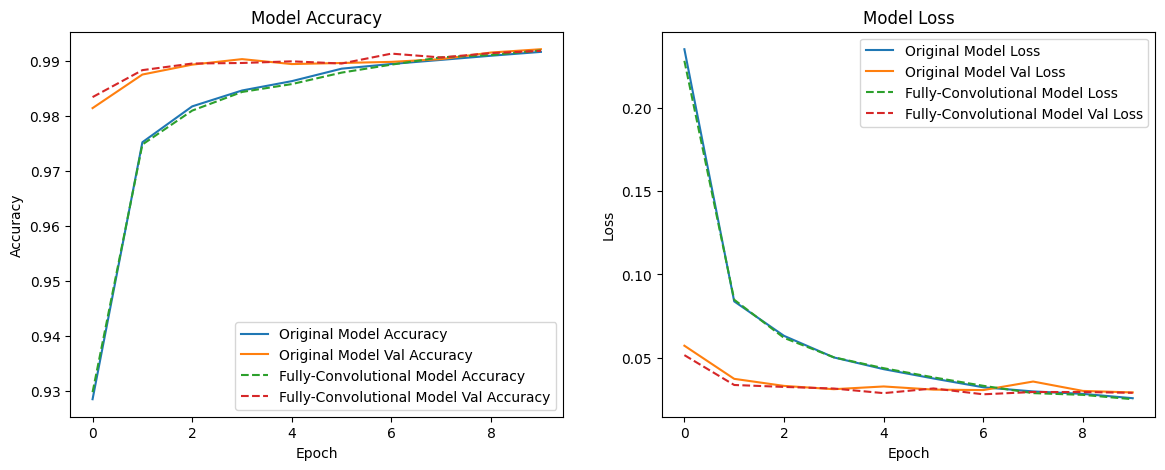

In [10]:
def original_mnist_model():
    """Code for the original MNIST model."""
    # Original MNIST model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())  # Flatten layer
    model.add(Dense(128, activation='relu'))  # Fully-connected layer
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # Fully-connected output layer

    return model

# Initialize original model
original_model = original_mnist_model()
original_model.summary()

from keras.layers import GlobalAveragePooling2D

def conv_mnist_model():
    """Generates a fully convolutional MNIST model."""
    model_fc = Sequential()

    # Same convolutional layers as before
    model_fc.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_fc.add(Conv2D(64, (3, 3), activation='relu'))
    model_fc.add(MaxPooling2D(pool_size=(2, 2)))
    model_fc.add(Dropout(0.25))

    # Replace Flatten + Dense(128) with Conv2D
    # Keep 12x12x64 output shape from the previous MaxPooling layer
    model_fc.add(Conv2D(128, (12, 12), activation='relu'))  # This is equivalent to Dense(128)
    model_fc.add(Dropout(0.5))

    # Replace Dense(10) with a 1x1 convolution followed by GlobalAveragePooling
    model_fc.add(Conv2D(10, (1, 1), activation='softmax'))  # This replaces Dense(10)
    model_fc.add(GlobalAveragePooling2D())  # Global Average Pooling replaces the Flatten step

    return model_fc

# Initialize fully convolutional model
conv_model = conv_mnist_model()
conv_model.summary()

# load the MNIST the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
X_train = (X_train / 255.0).astype(np.float32)
X_test = (X_test / 255.0).astype(np.float32)

# convert the data to channel-last
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Fit the models
original_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
conv_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Fit both models for 3 epochs
history_original = original_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
history_conv = conv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Plot accuracy and loss
def plot_accuracy_and_loss(history1, history2):
    """Plots the accuracies and losses for the original and fully convolutional MNIST models."""
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Original Model Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Original Model Val Accuracy')
    plt.plot(history2.history['accuracy'], label='Fully-Convolutional Model Accuracy', linestyle='--')
    plt.plot(history2.history['val_accuracy'], label='Fully-Convolutional Model Val Accuracy', linestyle='--')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Original Model Loss')
    plt.plot(history1.history['val_loss'], label='Original Model Val Loss')
    plt.plot(history2.history['loss'], label='Fully-Convolutional Model Loss', linestyle='--')
    plt.plot(history2.history['val_loss'], label='Fully-Convolutional Model Val Loss', linestyle='--')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    plt.show()

plot_accuracy_and_loss(history_original, history_conv)

## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>


<font color='#3CB371'>Skip connections in the U-Net architecture help preserve spatial information from earlier layers by combining low-level features with high-level ones during upsampling. This allows the network to better localize features, which is crucial for segmentation tasks. If you omit skip connections, it is still possible to train the architecture. However, the result would likely be less accurate because the network would have less access to the fine details from the earlier layers, leading to poorer segmentation performance. The skip connections reduce the risk of information loss during downsampling, and without them, the network may struggle to reconstruct detailed segmentations.


## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>

<font color='#3CB371'>Data augmentation helps combat overfitting by artificially increasing the size and diversity of the training set. It forces the model to generalize better by introducing variations (e.g., rotation, scaling, or intensity changes) that the model hasn't seen before. Data augmentation is not typically applied to test samples because the purpose of the test set is to evaluate the model's performance on unseen data. Augmenting test data would invalidate the evaluation by making the test data different from the distribution the model was trained to generalize towards.



Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

In [12]:
from unet_model import unet
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# use a single training image, to better demonstrate the effects of data augmentation
X_train2, y_train2 = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)
# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))
patch_size = (32, 32)
patches_per_im = 200

model2 = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)
model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [13]:
from week_4_functions import bright_augmented_datagenerator
history2 = model2.fit(bright_augmented_datagenerator(X_train2, y_train2, patch_size, patches_per_im, batch_size),
                    validation_data=(val_images, val_segmentations), 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=epochs, 
                    callbacks=[early_stopping], 
                    verbose=2)

Epoch 1/250
50/50 - 56s - 1s/step - accuracy: 0.7106 - loss: 0.6342 - val_accuracy: 0.9211 - val_loss: 0.5767
Epoch 2/250
50/50 - 27s - 543ms/step - accuracy: 0.8855 - loss: 0.4765 - val_accuracy: 0.9211 - val_loss: 0.3822
Epoch 3/250
50/50 - 26s - 518ms/step - accuracy: 0.9193 - loss: 0.3598 - val_accuracy: 0.9212 - val_loss: 0.2998
Epoch 4/250
50/50 - 25s - 491ms/step - accuracy: 0.9260 - loss: 0.2803 - val_accuracy: 0.9212 - val_loss: 0.2711
Epoch 5/250
50/50 - 26s - 510ms/step - accuracy: 0.9309 - loss: 0.2408 - val_accuracy: 0.9211 - val_loss: 0.2801
Epoch 6/250
50/50 - 25s - 508ms/step - accuracy: 0.9263 - loss: 0.2370 - val_accuracy: 0.9212 - val_loss: 0.3029
Epoch 7/250
50/50 - 27s - 540ms/step - accuracy: 0.9342 - loss: 0.2106 - val_accuracy: 0.9220 - val_loss: 0.2601
Epoch 8/250
50/50 - 26s - 516ms/step - accuracy: 0.9301 - loss: 0.2176 - val_accuracy: 0.9235 - val_loss: 0.2199
Epoch 9/250
50/50 - 27s - 542ms/step - accuracy: 0.9350 - loss: 0.2027 - val_accuracy: 0.8609 - val


Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.



In [15]:
from unet_model import unet
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# use a single training image, to better demonstrate the effects of data augmentation
X_train3, y_train3 = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)
# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))
patch_size = (32, 32)
patches_per_im = 200

model3 = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)
model3.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
early_stopping3 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [18]:
from week_4_functions import fully_augmented_datagenerator
history3 = model3.fit(fully_augmented_datagenerator(X_train3, y_train3, patch_size, patches_per_im, batch_size),
                    validation_data=(val_images, val_segmentations), 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=epochs, 
                    callbacks=[early_stopping3], 
                    verbose=2)

Epoch 1/250
50/50 - 37s - 746ms/step - accuracy: 0.8594 - loss: 0.4765 - val_accuracy: 0.9211 - val_loss: 0.3380
Epoch 2/250
50/50 - 26s - 514ms/step - accuracy: 0.8870 - loss: 0.3185 - val_accuracy: 0.9211 - val_loss: 0.2946
Epoch 3/250
50/50 - 25s - 510ms/step - accuracy: 0.8868 - loss: 0.2668 - val_accuracy: 0.9211 - val_loss: 0.2704
Epoch 4/250
50/50 - 24s - 484ms/step - accuracy: 0.8889 - loss: 0.2484 - val_accuracy: 0.9211 - val_loss: 0.2595
Epoch 5/250
50/50 - 20s - 406ms/step - accuracy: 0.8906 - loss: 0.2413 - val_accuracy: 0.9199 - val_loss: 0.2716
Epoch 6/250
50/50 - 21s - 419ms/step - accuracy: 0.8919 - loss: 0.2368 - val_accuracy: 0.8936 - val_loss: 0.3556
Epoch 7/250
50/50 - 20s - 406ms/step - accuracy: 0.8956 - loss: 0.2272 - val_accuracy: 0.8892 - val_loss: 0.3601
Epoch 8/250
50/50 - 20s - 405ms/step - accuracy: 0.8916 - loss: 0.2318 - val_accuracy: 0.9026 - val_loss: 0.2700
Epoch 9/250
50/50 - 21s - 420ms/step - accuracy: 0.8913 - loss: 0.2284 - val_accuracy: 0.8378 - 

## Comparison of all models:

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


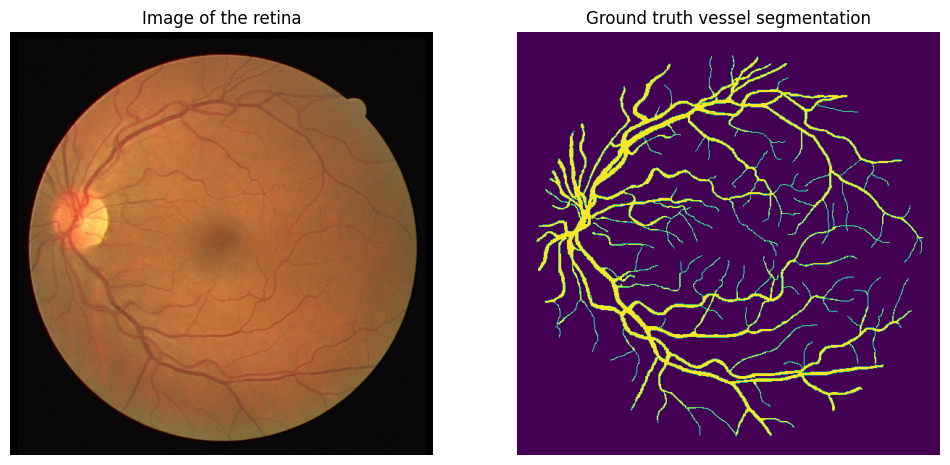

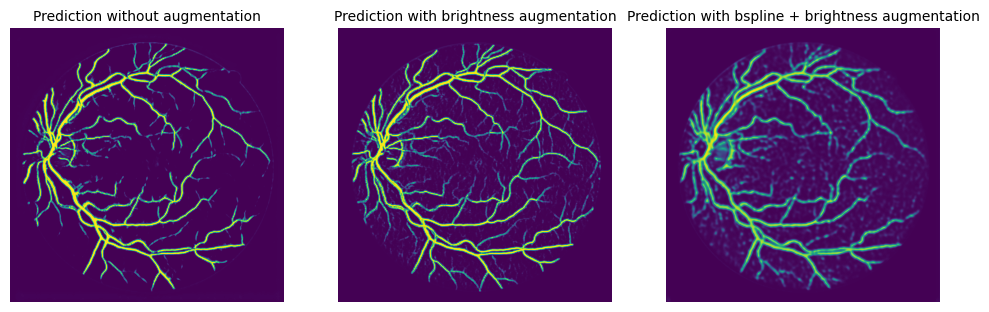

In [25]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + '/test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction1 = model.predict(X_test, batch_size=4)
test_prediction2 = model2.predict(X_test, batch_size=4)
test_prediction3 = model3.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.show()

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.title("Prediction without augmentation",fontsize = 10)
plt.axis('off')
plt.imshow(test_prediction1[0, :, :, 0])

plt.subplot(1, 3, 2)
plt.title("Prediction with brightness augmentation",fontsize = 10)
plt.axis('off')
plt.imshow(test_prediction2[0, :, :, 0])

plt.subplot(1, 3, 3)
plt.title("Prediction with bspline + brightness augmentation",fontsize = 10)
plt.axis('off')
plt.imshow(test_prediction3[0, :, :, 0])


plt.show()

## Training results:

The model that did not use any augmented data during training converged after 46 epochs, and had the following performance metrics: accuracy: 0.9691 - loss: 0.0808 - val_accuracy: 0.8605 - val_loss: 0.3567.

The model that used random brightness offset data augmentation converged after 47 epochs and had the following performance metrics: accuracy: 0.9438 - loss: 0.1638 - val_accuracy: 0.9445 - val_loss: 0.1565.

The model that used both brightness offset and bspline geometric data augmentation converged after 47 epochs, and had the following performance metrics: accuracy: 0.9013 - loss: 0.1937 - val_accuracy: 0.9421 - val_loss: 0.1623

All in all it can be noted that the data augmentation did not have a real effect on the amount of epochs necessary for model convergance. However, we do see a great increase in validation accuracy after the data augmentation has been applied.


**Another thing important to mention is that the performance of the final model, using both brightness and bspline geometric data augmentation, was heavily dependent on the initialization, as there was a great difference in convergence and final performance between independent training instances.**

## Analysis of plots

Overall we see that the addition of a brightness offset to the training data had a succesful effect on model training, as a larger surface area of the bloodvessels is segmented in the middle image. Adding a subsequent bspline geometric data augmentation further increased this surface area, though the final results looks convoluted. It is expected that this is caused due to the geometric deformations introduced during data augmentation, causing the vessels to become diluted in some images.